In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

import matplotlib.pyplot as plt
import seaborn as sns

DATA_PROCESSED = Path("../data/processed")

# Chargement des jeux encodés
X = pd.read_parquet(DATA_PROCESSED / "X_encoded.parquet")
y = pd.read_parquet(DATA_PROCESSED / "y_target.parquet")["target"]

print("✅ X :", X.shape, "| y :", y.shape)


✅ X : (1470, 42) | y : (1470,)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Train :", X_train.shape, "| Test :", X_test.shape)


✅ Train : (1176, 42) | Test : (294, 42)


🔹 DummyClassifier
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



c:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\Auto_classif_data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\Auto_classif_data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\Auto_classif_data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

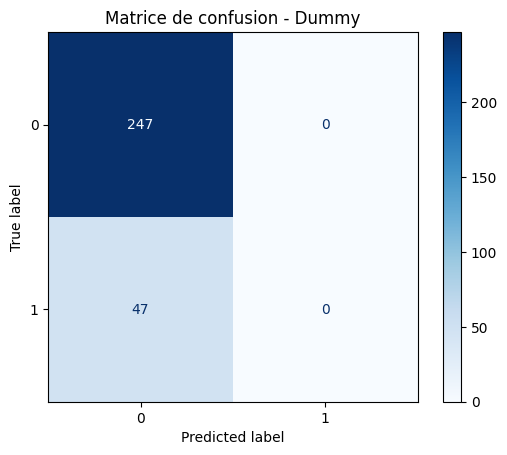

In [3]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

print("🔹 DummyClassifier")
print(classification_report(y_test, y_pred_dummy))

ConfusionMatrixDisplay.from_estimator(dummy, X_test, y_test, cmap="Blues")
plt.title("Matrice de confusion - Dummy")
plt.show()


🔹 Régression Logistique
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       247
           1       0.90      0.40      0.56        47

    accuracy                           0.90       294
   macro avg       0.90      0.70      0.75       294
weighted avg       0.90      0.90      0.88       294



c:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\Auto_classif_data\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


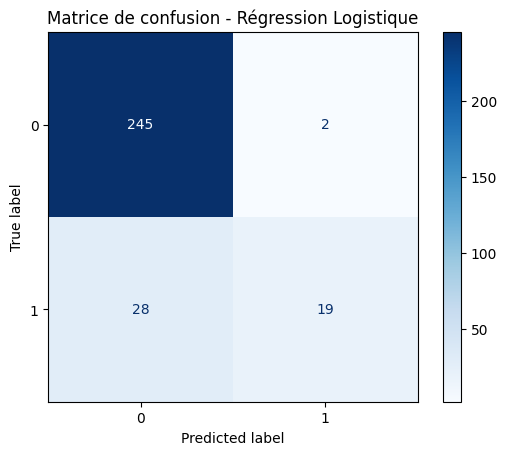

In [4]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("🔹 Régression Logistique")
print(classification_report(y_test, y_pred_log))

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap="Blues")
plt.title("Matrice de confusion - Régression Logistique")
plt.show()


🔹 Random Forest
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



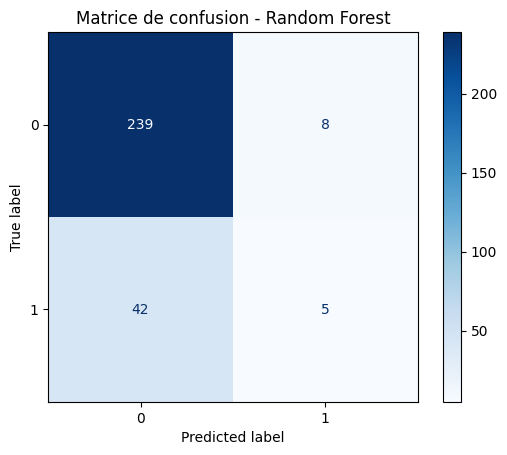

In [5]:
rf = RandomForestClassifier(
    n_estimators=200, 
    random_state=42, 
    class_weight="balanced", 
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Blues")
plt.title("Matrice de confusion - Random Forest")
plt.show()


c:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\Auto_classif_data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Accuracy,Précision,Rappel
Modèle,,,
Dummy,0.840,0.000,0.000
Logistique,0.898,0.905,0.404
RandomForest,0.830,0.385,0.106


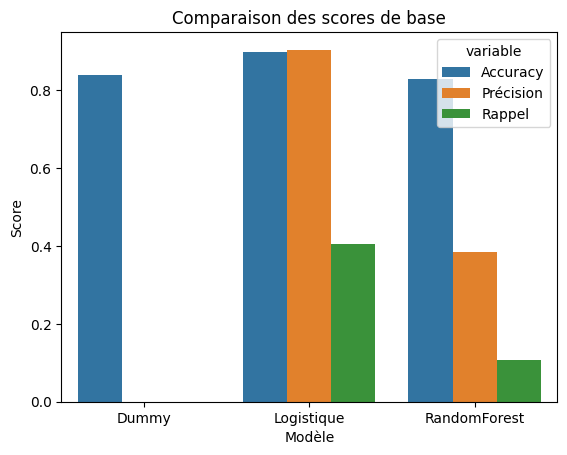

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def scores(name, y_true, y_pred):
    return {
        "Modèle": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Précision": precision_score(y_true, y_pred),
        "Rappel": recall_score(y_true, y_pred),
    }

results = [
    scores("Dummy", y_test, y_pred_dummy),
    scores("Logistique", y_test, y_pred_log),
    scores("RandomForest", y_test, y_pred_rf),
]

df_results = pd.DataFrame(results).set_index("Modèle")
display(df_results.round(3))

sns.barplot(data=df_results.reset_index().melt(id_vars="Modèle"), x="Modèle", y="value", hue="variable")
plt.title("Comparaison des scores de base")
plt.ylabel("Score")
plt.show()
